# Main experiments in Chapter 7 Thesis and some from Chapter 8

In [2]:
%load_ext autoreload
%autoreload 

In [3]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json

In [4]:
def print_config(name):
# read and print .json file
   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)
   return

### MLP Best

In [5]:
query = {"experiment": "JM_MLP_s2s_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [6]:
print_config('config_MLP_s2s')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


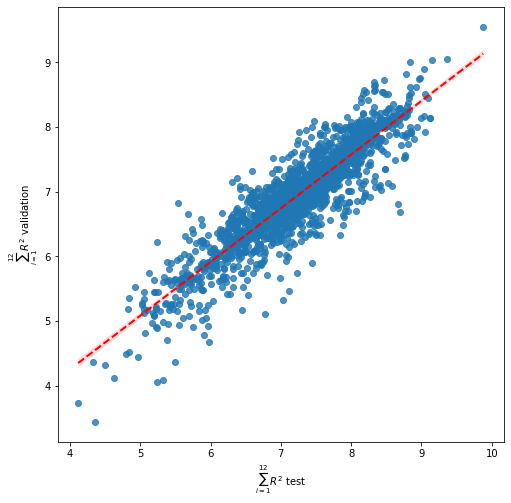

In [7]:
results.plot_densplot(plot='regression',glm=False, figsize=(8,8), save = 'MLP_best_densplot', saveformat='png' )

2000

MEAN (test)= 7.253844933539594
StDev (test)= 0.7921884840690845
MEAN (val)= 6.9538853547416934
StDev (val)= 0.7320343946147412


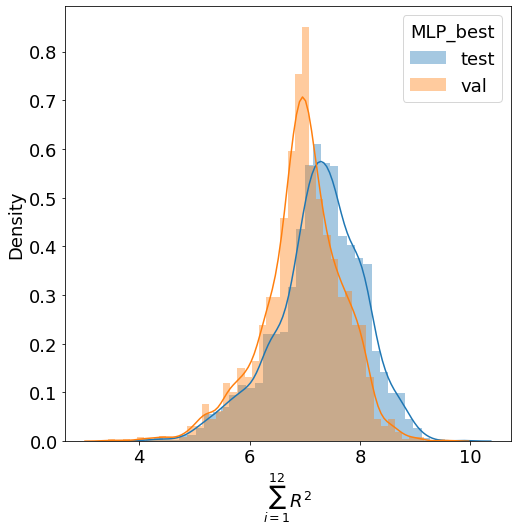

In [8]:
results.sample(1)
results.selected_size()
results.plot_distplot(seaborn=True, dset=('test', 'val'),figsize=(8,8), title='MLP_best', font=18, labels=['test','val'],saveformat='png', save='MLP_best_distplot')

### CNN Best - JM_CNN_s2s_best

In [9]:
query = {"experiment": "JM_CNN_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [10]:
print_config('config_CNN_s2s_best')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.1],
          'activation_full': ['leaky', 0.4],
          'dilation': False,
          'drop': 0.5,
          'filters': [512],
          'full': [1024, 512, 256],
          'fulldrop': 0.5,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_s2s_cas',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.253844933539595
StDev (test)= 0.7921884840690845
MEAN (val)= 6.9538853547416934
StDev (val)= 0.7320343946147413


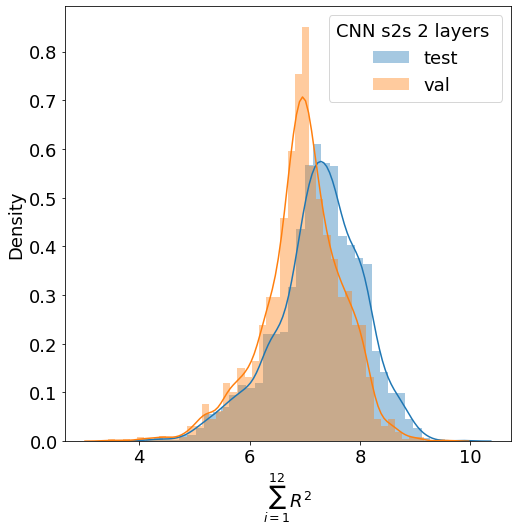

In [9]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='CNN s2s 2 layers ', font=18, labels=['test','val'],save='CNN_2l_s2s_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12448
Method:                          IRLS   Log-Likelihood:                -753.24
Date:                Wed, 12 Feb 2020   Deviance:                       248.70
Time:                        08:53:33   Pearson chi2:                     249.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6509      0.072      9.000      0.000       0.509       0.793
validation     0.9495      0.011     90.346      0.0

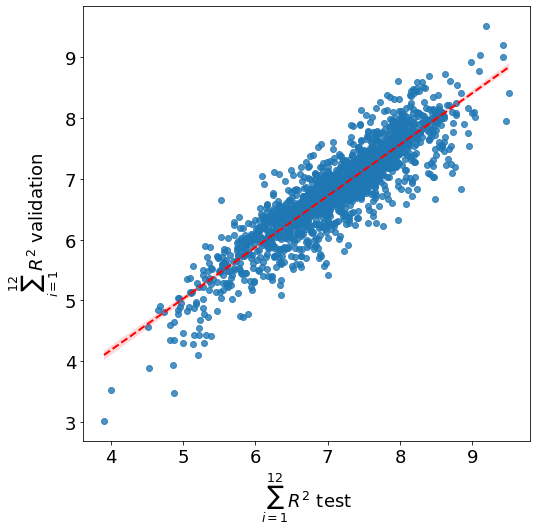

In [12]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="CNN_2l_s2s_densplot", saveformat="png")

### MLP recursive

In [13]:
query = {"experiment": "JM_MLP_rec","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1720

In [14]:
print_config('config_MLP_s2s_rec')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_rec'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


1720

[5.64047017 6.25231928 7.4745051  ... 5.76882836 7.13737036 6.77305763]
MEAN (test)= 7.109208677741431
StDev (test)= 0.7886312101405067
MEAN (val)= 6.825748620604657
StDev (val)= 0.7277632934768129


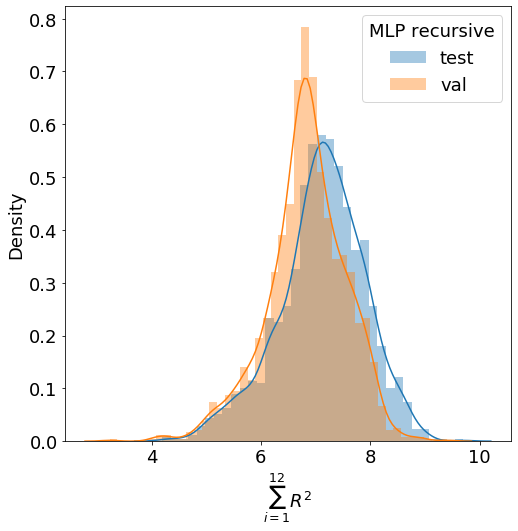

In [15]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP recursive', font=18, labels=['test','val'],save='MLP_rec_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 1720
Model:                            GLM   Df Residuals:                     1718
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11353
Method:                          IRLS   Log-Likelihood:                -568.46
Date:                Wed, 12 Feb 2020   Deviance:                       195.04
Time:                        08:53:37   Pearson chi2:                     195.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4208      0.077      5.491      0.000       0.271       0.571
validation     0.9799      0.011     87.777      0.0

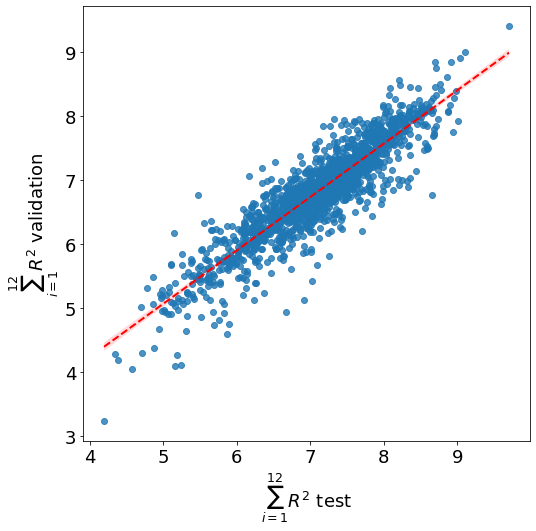

In [16]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="MLP_rec_densplot", saveformat="png")

### MLP future (temperature in future) low resolution weather input in future - JM_MLP_s2s_fut

In [17]:
query = {"experiment": "JM_MLP_s2s_fut","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [18]:
print_config('config_MLP_s2s_future')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_fut'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'dmatrix': 'future',
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': [0, 1, 2, 3, 4, 5, 6],
          'varsf': [2]},
 'experiment': 'JM_MLP_s2s_fut',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

[7.41185042 8.65172701 7.34137939 ... 7.59543044 7.72213275 8.73480215]
MEAN (test)= 7.806734885214625
StDev (test)= 0.7846854959994536
MEAN (val)= 7.541478309526616
StDev (val)= 0.7491914881900474


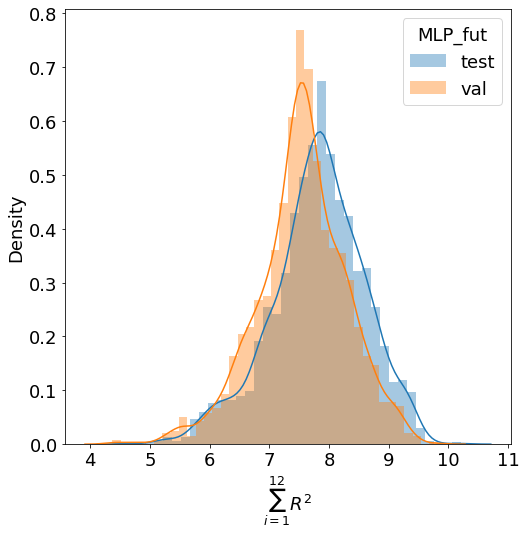

In [19]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_fut', font=18, labels=['test','val'],save='MLP_fut_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11391
Method:                          IRLS   Log-Likelihood:                -664.50
Date:                Wed, 12 Feb 2020   Deviance:                       227.59
Time:                        08:53:41   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6751      0.076      8.843      0.000       0.525       0.825
validation     0.9457      0.010     93.878      0.0

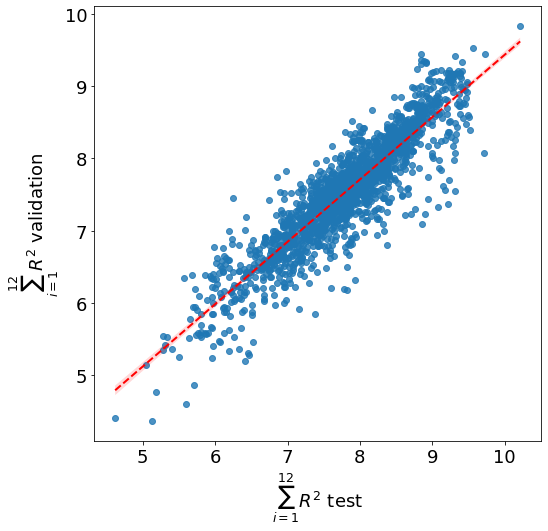

In [20]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="MLP_fut_densplot", saveformat="png")

### MLP Cascade

In [21]:
query = {"experiment": "JM_MLP_cas_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [22]:
print_config('config_MLP_s2s_cas_best')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.3],
          'activation_full': ['leaky', 0.3],
          'batchnorm': True,
          'drop': 0.4,
          'full': [1024, 512, 512],
          'fulldrop': 0.5,
          'mode': 'MLP_s2s_cas'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

[7.17711221 6.73394321 7.92942332 ... 7.83530326 6.48965856 5.77184114]
MEAN (test)= 7.2504926159947605
StDev (test)= 0.8011011642044916
MEAN (val)= 6.928719753975598
StDev (val)= 0.7369461154955377


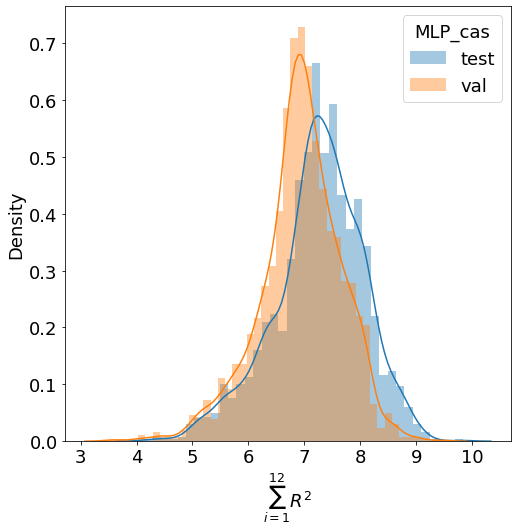

In [23]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_cas', font=18, labels=['test','val'],save='MLP_cas_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12902
Method:                          IRLS   Log-Likelihood:                -789.12
Date:                Wed, 12 Feb 2020   Deviance:                       257.79
Time:                        08:53:45   Pearson chi2:                     258.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5173      0.076      6.812      0.000       0.368       0.666
validation     0.9718      0.011     89.163      0.0

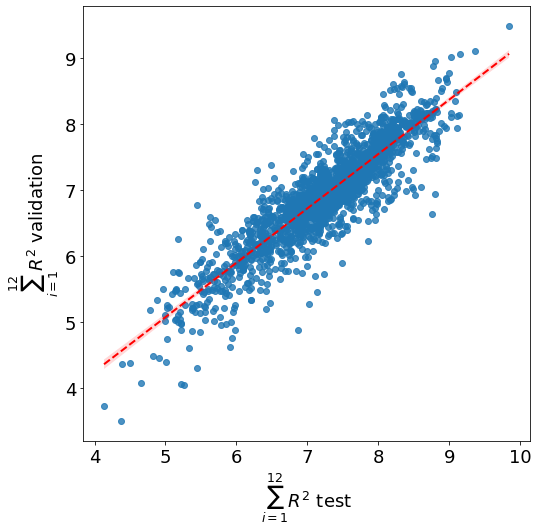

In [24]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_cas_densplot", saveformat="png")

### RNN best

In [25]:
query = {"experiment": "JM_RNN_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [26]:
print_config('config_RNN_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

[7.88221138 9.02310105 8.95700775 ... 7.15748955 5.62384651 5.84323667]
MEAN (test)= 7.146648816983471
StDev (test)= 0.7973877848925358
MEAN (val)= 6.823080669923635
StDev (val)= 0.7362937589589522


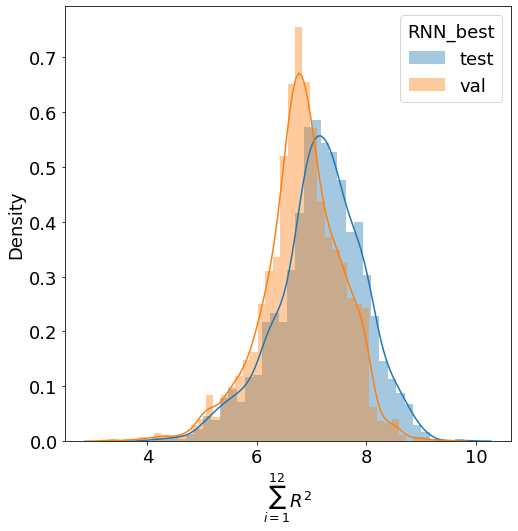

In [27]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN_best', font=18, labels=['test','val'],save='RNN_best_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12704
Method:                          IRLS   Log-Likelihood:                -773.64
Date:                Wed, 12 Feb 2020   Deviance:                       253.83
Time:                        08:53:49   Pearson chi2:                     254.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5359      0.074      7.214      0.000       0.390       0.681
validation     0.9689      0.011     89.508      0.0

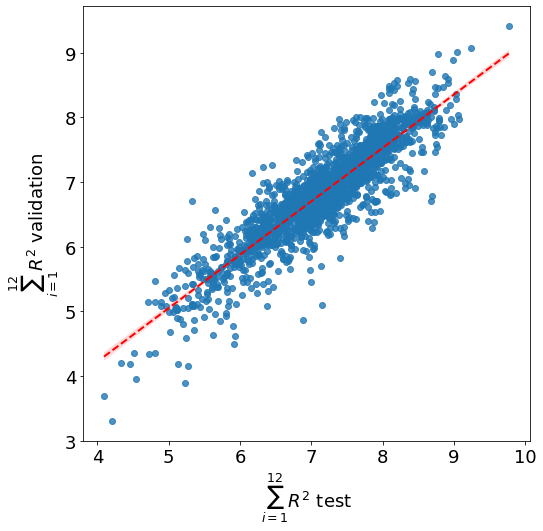

In [28]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_best_densplot", saveformat="png")

## RNN Attention

In [29]:
query = {"experiment": "JM_RNN_Att","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [30]:
print_config('config_RNN_Att_s2s')

{'_id': '00000001',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'attsize': 16,
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s_att',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_Att',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 

[7.93508844 9.04156047 8.95311684 ... 7.12678453 5.68154587 5.77898221]
MEAN (test)= 7.1456860286679404
StDev (test)= 0.7974393463636342
MEAN (val)= 6.821444722454136
StDev (val)= 0.7372843065012561


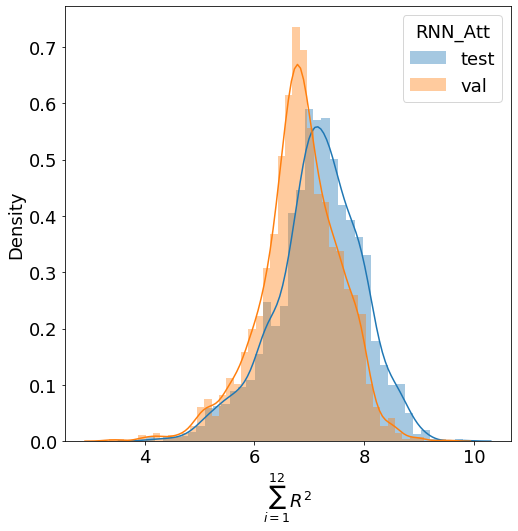

In [31]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN_Att', font=18, labels=['test','val'],save='RNN_Att_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12877
Method:                          IRLS   Log-Likelihood:                -787.19
Date:                Wed, 12 Feb 2020   Deviance:                       257.29
Time:                        08:53:54   Pearson chi2:                     257.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5561      0.075      7.447      0.000       0.410       0.702
validation     0.9660      0.011     88.760      0.0

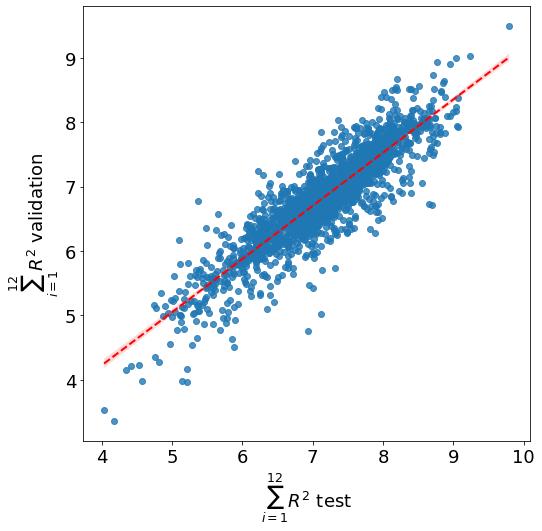

In [32]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_Att_densplot", saveformat="png")

### RNN ED

In [33]:
query = {"experiment": "JM_RNN_ED","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [34]:
print_config('config_RNN_ED_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': False,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': [False, False],
          'bimerge': 'ave',
          'drop': 0.0,
          'full': [512],
          'fulldrop': 0.5,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_ED_s2s',
          'neuronsD': 512,
          'neuronsE': 256,
          'nlayersD': 1,
          'nlayersE': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 1,
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'MULTIPLE',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
           

2000

[7.13878934 6.04780442 6.60182159 ... 6.12714381 6.84893465 7.95190699]
MEAN (test)= 7.108911561225494
StDev (test)= 0.8045799065517066
MEAN (val)= 6.78669647132964
StDev (val)= 0.7491632492122784


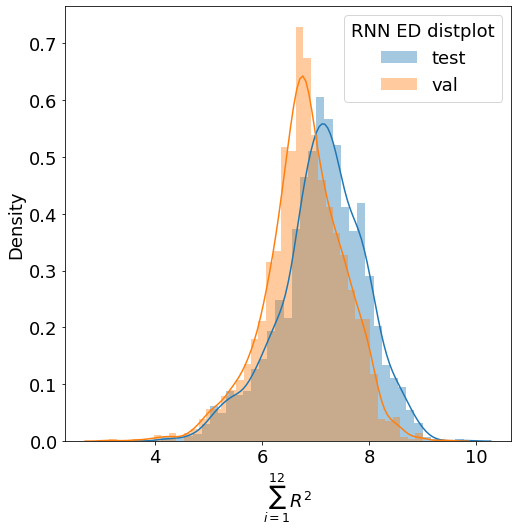

In [35]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN ED distplot', font=18, labels=['test','val'],save='RNN_ED_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12977
Method:                          IRLS   Log-Likelihood:                -794.87
Date:                Wed, 12 Feb 2020   Deviance:                       259.28
Time:                        08:53:58   Pearson chi2:                     259.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5907      0.073      8.047      0.000       0.447       0.735
validation     0.9604      0.011     89.326      0.0

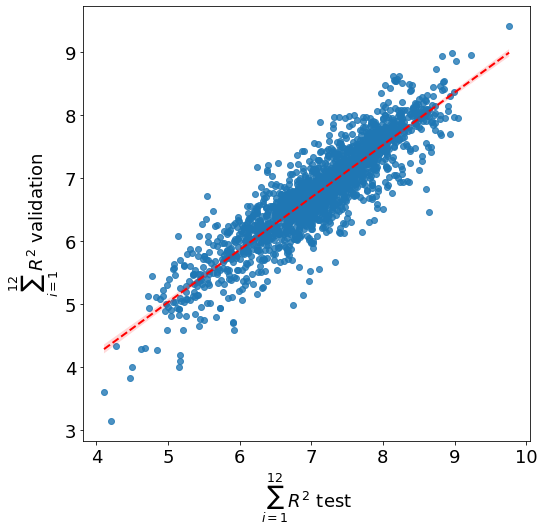

In [36]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_ED_densplot", saveformat="png")

### MLP SJOINT

In [37]:
query = {"experiment": "JM_MLP_SJOINT","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [38]:
print_config('config_MLP_s2s_sjoint')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.2],
          'drop': 0.0,
          'full': [1024, 256, 128],
          'mode': 'MLP_s2s_sjoint'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 1,
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'slice': 6,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 1,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

[5.85728594 6.5122563  6.13384905 ... 5.97992709 5.53736369 5.3811412 ]
MEAN (test)= 6.608029579571341
StDev (test)= 0.8041766377581279
MEAN (val)= 6.333077455636665
StDev (val)= 0.7091278978731435


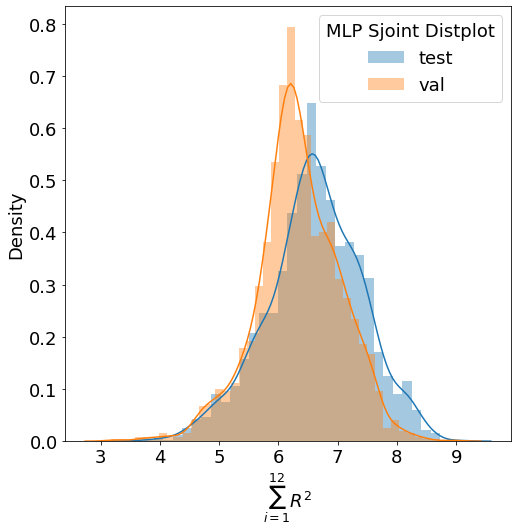

In [39]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP Sjoint Distplot', font=18, labels=['test','val'],save='MLP_SJOINT_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.14947
Method:                          IRLS   Log-Likelihood:                -936.21
Date:                Wed, 12 Feb 2020   Deviance:                       298.64
Time:                        08:54:02   Pearson chi2:                     299.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3096      0.078      3.985      0.000       0.157       0.462
validation     0.9945      0.012     81.580      0.0

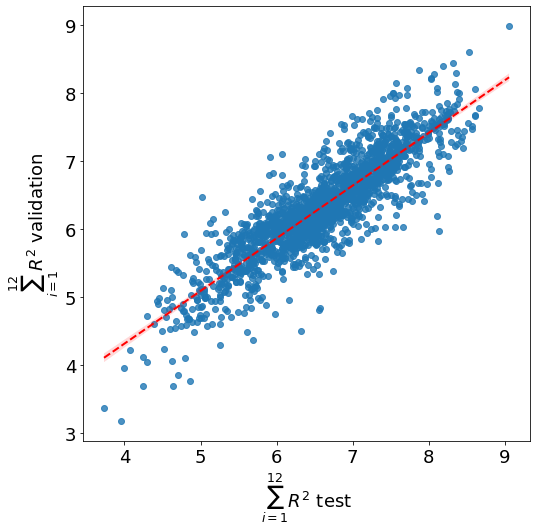

In [40]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_SJOINT_densplot", saveformat="png")

### BASELINES

### Random Forest JM_RF_s2s_2

In [41]:
query = {"experiment": "JM_RF_s2s_2","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

In [42]:
print_config('config_RF_s2s(JM)')

{'_id': '00000000',
 'arch': {'max_features': 'auto',
          'mode': 'RF_s2s',
          'n_estimators': 400,
          'oob_score': True},
 'data': {'ahead': [1, 12],
          'datanames': ['10-5328-12'],
          'dataset': 1,
          'datasize': 43834,
          'dmatrix': 'normal',
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'JM_RF_s2s',
 'training': {}}


126692

[5.6704717  7.25676716 7.71718635 ... 7.4475969  7.04360727 8.3862065 ]
MEAN (test)= 6.770120707927507
StDev (test)= 0.8047620859978747
MEAN (val)= 6.532462243553212
StDev (val)= 0.7377275195651427


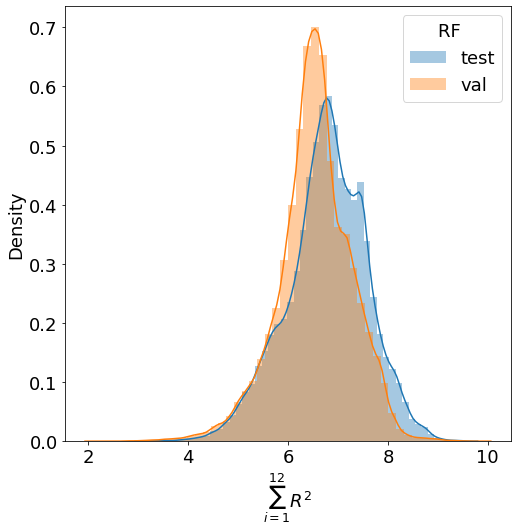

In [43]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RF ', font=18, labels=['test','val'],save='RF_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126692
Model:                            GLM   Df Residuals:                   126690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.14254
Method:                          IRLS   Log-Likelihood:                -56359.
Date:                Wed, 12 Feb 2020   Deviance:                       18058.
Time:                        08:54:40   Pearson chi2:                 1.81e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4769      0.009     50.455      0.000       0.458       0.495
validation     0.9634      0.001    670.046      0.0

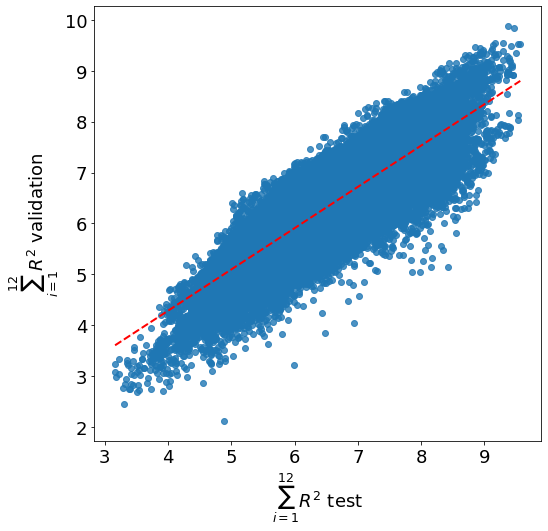

In [44]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RF_densplot", saveformat="png")

### Persistence

In [45]:
query = {"experiment": "Persistence","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

126692

[ 2.1799377   3.59129228 -0.88562069 ...  2.12078683  5.04204997
  1.79859431]
MEAN (test)= 2.6989266365223457
StDev (test)= 1.9511900646278681
MEAN (val)= 2.4864331117051606
StDev (val)= 1.9197421745534917


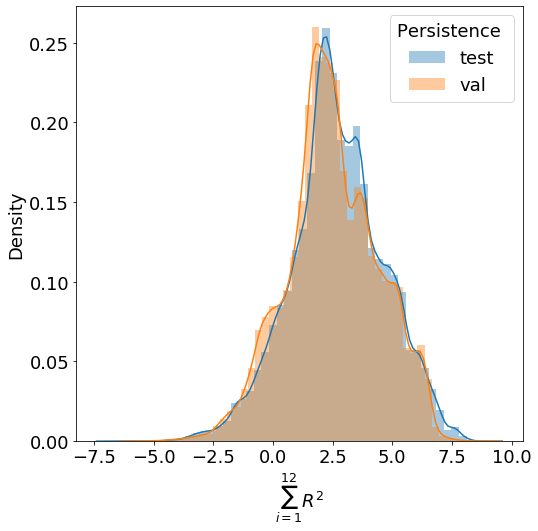

In [46]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='Persistence ', font=18, labels=['test','val'],save='Persistence_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126692
Model:                            GLM   Df Residuals:                   126690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.40190
Method:                          IRLS   Log-Likelihood:            -1.2202e+05
Date:                Wed, 12 Feb 2020   Deviance:                       50917.
Time:                        08:55:16   Pearson chi2:                 5.09e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3089      0.003    105.980      0.000       0.303       0.315
validation     0.9612      0.001   1036.067      0.0

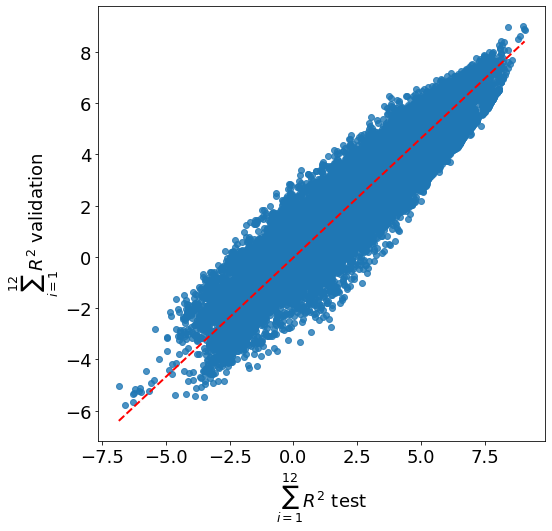

In [47]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="Persistence_densplot", saveformat="png")

### Persistence for 12 steps with series 5 m

In [48]:
query = {"experiment": "JM_Persistence_02_5m","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [49]:
print_config('config_persistence_5m')

{'_id': '00000000',
 'arch': {'mode': 'persistence'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-01'],
          'dataset': 0,
          'datasize': 526008,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {}}


2000

[10.96257159 11.6206893  11.31149847 ... 10.96834243 10.99951282
 11.21693082]
MEAN (test)= 10.946221664103911
StDev (test)= 0.343556166037185
MEAN (val)= 10.749256684087815
StDev (val)= 0.4359472965282758


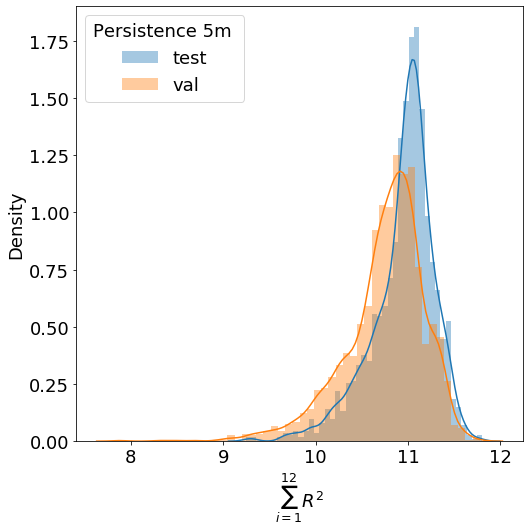

In [50]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='Persistence 5m ', font=18, labels=['test','val'],save='Persistence_5m_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.022471
Method:                          IRLS   Log-Likelihood:                 958.65
Date:                Wed, 12 Feb 2020   Deviance:                       44.897
Time:                        08:55:22   Pearson chi2:                     44.9
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3231      0.083     40.174      0.000       3.161       3.485
validation     0.7092      0.008     92.234      0.0

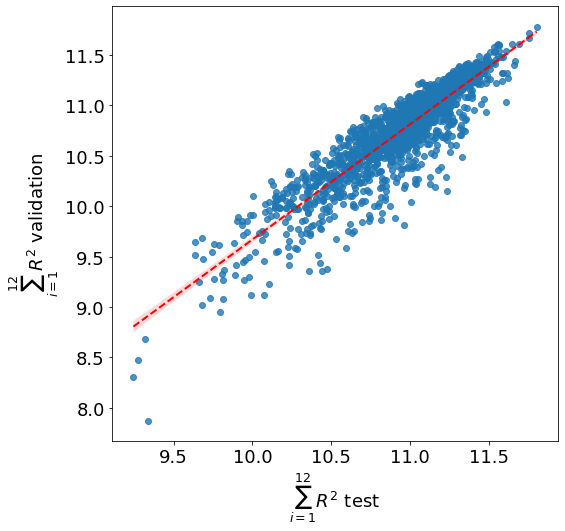

In [51]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="Persistence_5m_densplot", saveformat="png")

### KNN - knndir

In [52]:
query = {"experiment": "knndir","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

4200

In [53]:
print_config('config_KNN_s2s')

{'_id': '00000000',
 'arch': {'mode': 'KNN_s2s', 'n_neighbors': 101, 'weights': 'distance'},
 'data': {'ahead': 12,
          'datanames': ['10-5308-12'],
          'dataset': 0,
          'datasize': 43834,
          'dmatrix': 'normal',
          'fraction': 1,
          'lag': 4,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'iter': 1}}


4200

[4.18349758 3.65411696 6.35958016 ... 5.20983622 3.96118443 4.3665556 ]
MEAN (test)= 4.674979422670386
StDev (test)= 1.0271759675344432
MEAN (val)= 4.430169599221997
StDev (val)= 0.9414654783014574


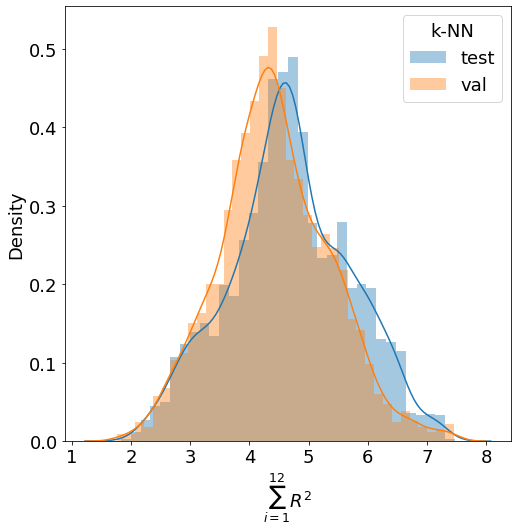

In [54]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='k-NN', font=18, labels=['test','val'],save='knn_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 4200
Model:                            GLM   Df Residuals:                     4198
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.20088
Method:                          IRLS   Log-Likelihood:                -2587.9
Date:                Wed, 12 Feb 2020   Deviance:                       843.29
Time:                        08:55:26   Pearson chi2:                     843.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3256      0.033      9.788      0.000       0.260       0.391
validation     0.9818      0.007    133.648      0.0

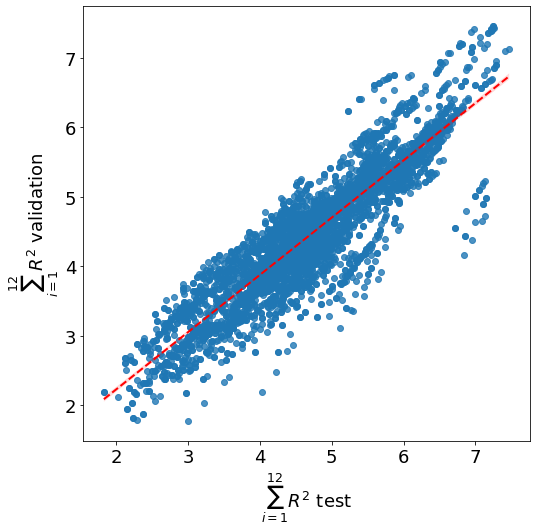

In [55]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="knn_densplot", saveformat="png")

### Direct vs seq 2 seq

### Direct regression

In [12]:
query = {"experiment": "JM_MLP_dir_reg","status":"done"}
# hay un error deberia ser JM_MLP_dir_reg (direct regression)
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [13]:
print_config('config_MLP_dir_reg')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_dir_reg'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


[7.69227565 8.97261588 8.89775572 ... 6.97691122 5.48862937 5.56757017]
MEAN (test)= 6.954994317390072
StDev (test)= 0.7871570730539449
MEAN (val)= 6.649818411292243
StDev (val)= 0.7219147483037911


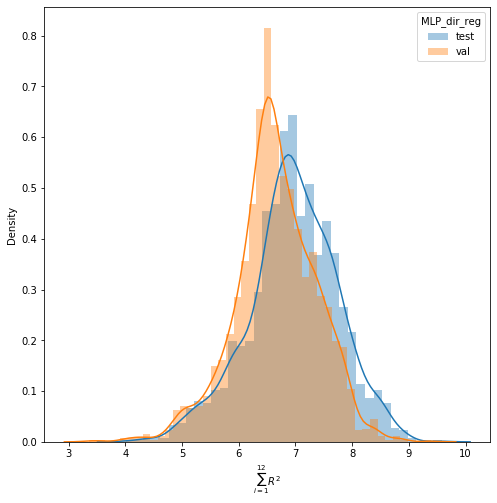

In [14]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), title='MLP_dir_reg', figsize=(8,8), save='MLP_Dir_reg_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12630
Method:                          IRLS   Log-Likelihood:                -767.78
Date:                Sun, 16 Feb 2020   Deviance:                       252.35
Time:                        00:41:20   Pearson chi2:                     252.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4844      0.074      6.579      0.000       0.340       0.629
validation     0.9730      0.011     88.396      0.0

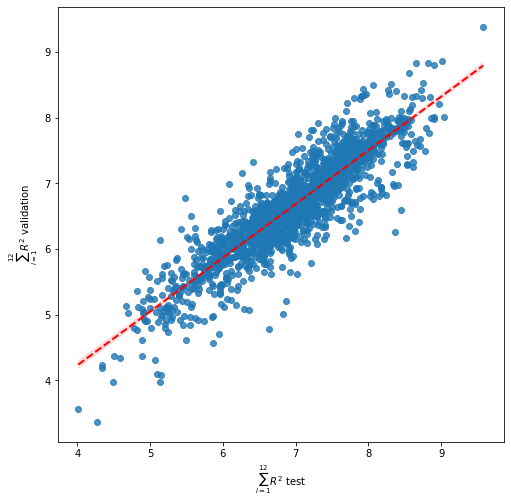

In [11]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_Dir_reg_densplot", saveformat="png")

### Series at 5m

### Persistence series 5m at 1h ahead

In [60]:
query = {"experiment": "JM_Persistence_02_5m", "status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [61]:
print_config('config_persistence_5m')

{'_id': '00000000',
 'arch': {'mode': 'persistence'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-01'],
          'dataset': 0,
          'datasize': 526008,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {}}


[10.99090385 11.2150893  11.24263343 ... 11.33334982 10.99690115
 10.88591767]
MEAN (test)= 10.946221664103913
StDev (test)= 0.343556166037185
MEAN (val)= 10.749256684087815
StDev (val)= 0.4359472965282758


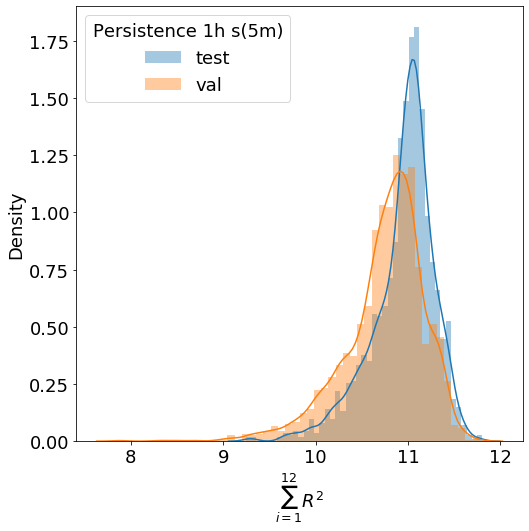

In [62]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum', title='Persistence 1h s(5m)', dset=(['test','val']), figsize=(8,8), save="Persistence_5m_1h_distplot", saveformat="png")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.022471
Method:                          IRLS   Log-Likelihood:                 958.65
Date:                Wed, 12 Feb 2020   Deviance:                       44.897
Time:                        08:55:35   Pearson chi2:                     44.9
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3231      0.083     40.174      0.000       3.161       3.485
validation     0.7092      0.008     92.234      0.0

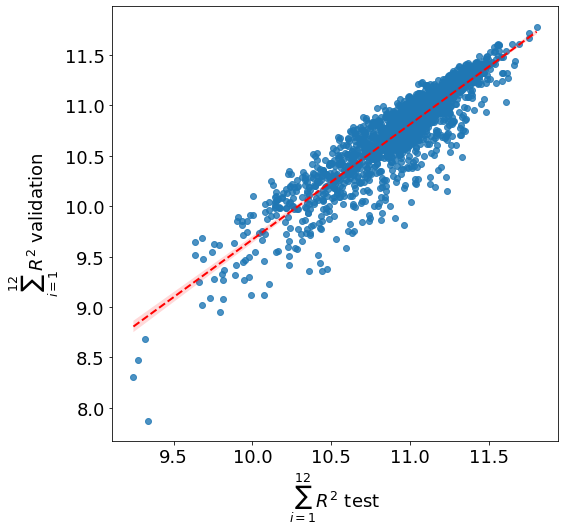

In [63]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="Persistence_5m_1h_densplot", saveformat="png")

### Prediction 12 time steps in the future with Series at 5min

In [64]:
query = {"experiment": "JM_MLP_5m_1h","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [65]:
print_config('config_MLP_5m_1h')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.4,
          'full': [1024, 512],
          'mode': 'MLP_s2s'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-01'],
          'dataset': 1,
          'datasize': 526008,
          'lag': 120,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


[11.13714562 11.31047906 11.33870027 ... 11.4312679  11.13258488
 11.07522746]
MEAN (test)= 11.123110041914195
StDev (test)= 0.26672608901208833
MEAN (val)= 10.950978900085858
StDev (val)= 0.34653201155496444


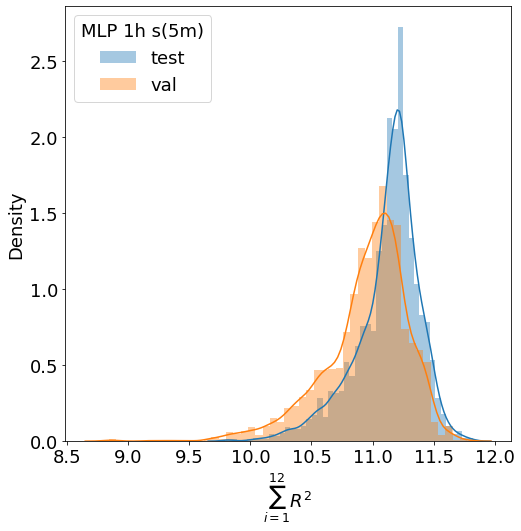

In [66]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum', title='MLP 1h s(5m)', dset=(['test','val']), figsize=(8,8), save="MLP_5m_1h_distplot", saveformat="png")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.015735
Method:                          IRLS   Log-Likelihood:                 1315.0
Date:                Wed, 12 Feb 2020   Deviance:                       31.438
Time:                        08:55:39   Pearson chi2:                     31.4
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6834      0.089     41.534      0.000       3.510       3.857
validation     0.6794      0.008     83.933      0.0

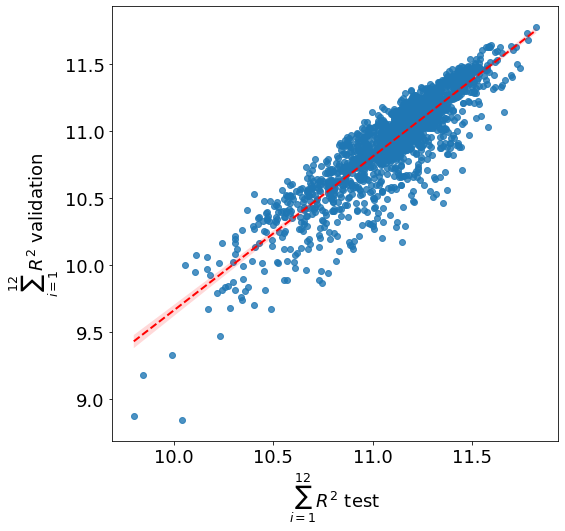

In [67]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_5m_1h_densplot", saveformat="png")

### Prediction 144 steps and group them by 12 prediction 12 hours ahead

In [68]:
query = {"experiment": "JM_MLP_5m_12h","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [69]:
print_config('config_MLP_s2s_5m_12h')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s'},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['54-27274-01'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'fraction': 1,
          'lag': 144,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


[8.16755085 9.09355985 9.07796641 ... 7.3417967  5.93210624 6.19256528]
MEAN (test)= 7.408763509128266
StDev (test)= 0.7749011931787776
MEAN (val)= 7.094670131025276
StDev (val)= 0.7243137745758044


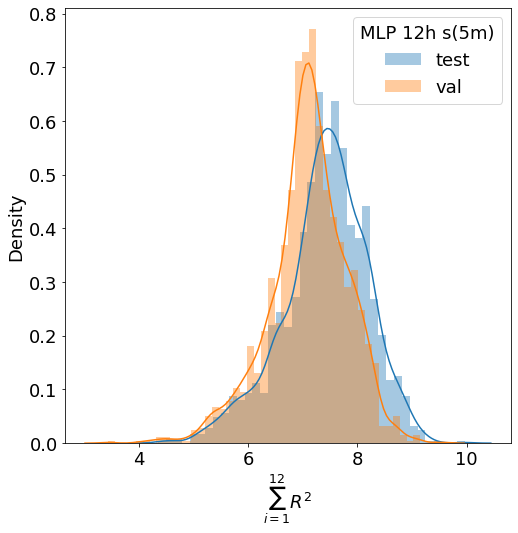

In [70]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(8,8), title='MLP 12h s(5m)', save='MLP_5m_12h_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11630
Method:                          IRLS   Log-Likelihood:                -685.26
Date:                Wed, 12 Feb 2020   Deviance:                       232.36
Time:                        08:55:44   Pearson chi2:                     232.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5923      0.075      7.889      0.000       0.445       0.739
validation     0.9608      0.011     91.261      0.0

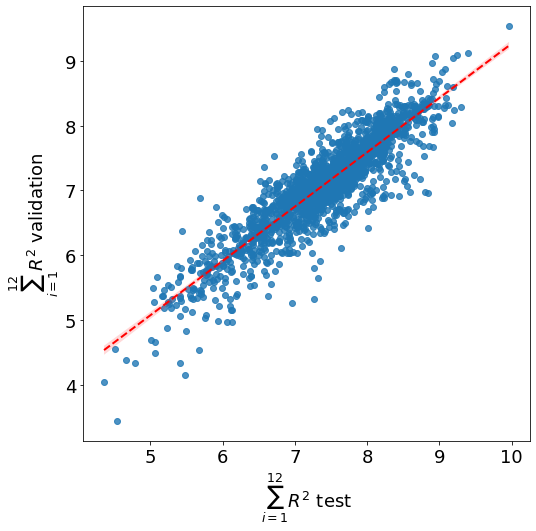

In [71]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_5m_12h_densplot", saveformat="png")

### MLP 12h 5m fut

In [72]:
query = {"experiment": "JM_MLP_5m_12h_fut","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [73]:
print_config('config_MLP_s2s_5m_12h_fut')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_fut'},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['54-27274-01'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'dmatrix': 'future',
          'fraction': 1,
          'lag': 144,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 210408,
          'vars': 'all',
          'varsf': [2]},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


[9.24885064 9.54760788 9.55493343 ... 7.78965467 6.69708632 6.69990439]
MEAN (test)= 8.02550984976425
StDev (test)= 0.7535906182315589
MEAN (val)= 7.74754911553163
StDev (val)= 0.7330564820427727


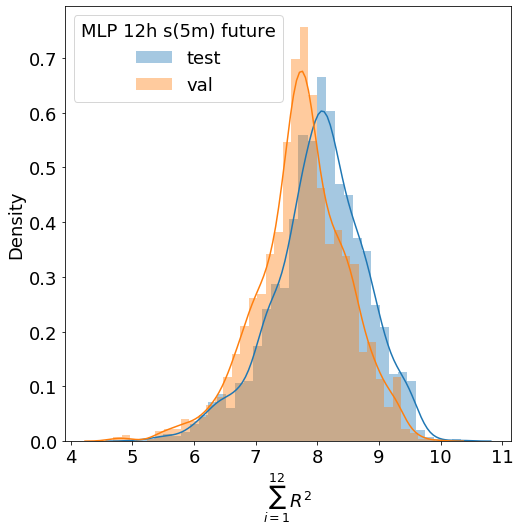

In [74]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(8,8), title='MLP 12h s(5m) future', save='MLP_5m_12h_fut_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.10645
Method:                          IRLS   Log-Likelihood:                -596.77
Date:                Wed, 12 Feb 2020   Deviance:                       212.68
Time:                        08:55:48   Pearson chi2:                     213.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8452      0.077     10.914      0.000       0.693       0.997
validation     0.9268      0.010     93.124      0.0

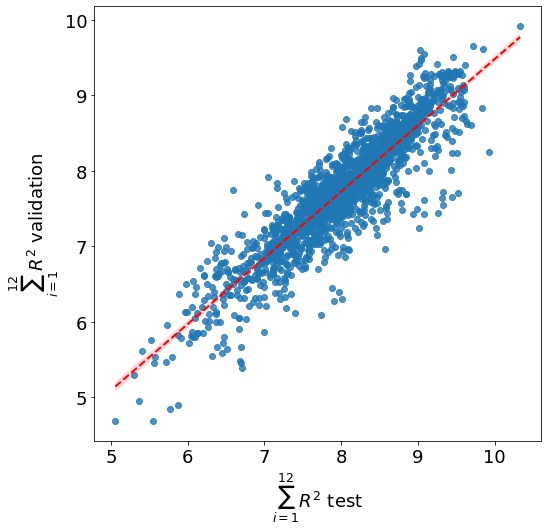

In [75]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_5m_12h_fut_densplot", saveformat="png")

### CNN 12h 5m

In [9]:
query = {"experiment": "JM_CNN_5m_12h_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [10]:
print_config('config_CNN_5m_12h_01')

{'_id': '00000000',
 'arch': {'activation': 'relu',
          'activation2': 'relu',
          'activation_full': 'linear',
          'depth_multiplier': 1,
          'depth_multiplier2': 1,
          'dilation': False,
          'drop': 0,
          'drop2': 0,
          'filters': [32],
          'filters2': [32],
          'full': [16, 8],
          'fulldrop': 0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [3],
          'mode': 'CNN_sep_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'aggregate': {'method': 'average', 'step': 12, 'what': ['y']},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,

[ 88.54829859 103.82688977 102.38092874 ...  83.23844221  63.91840918
  62.1105094 ]
MEAN (test)= 80.67667578327308
StDev (test)= 9.827054577406559
MEAN (val)= 76.54758953098182
StDev (val)= 9.138081836004565


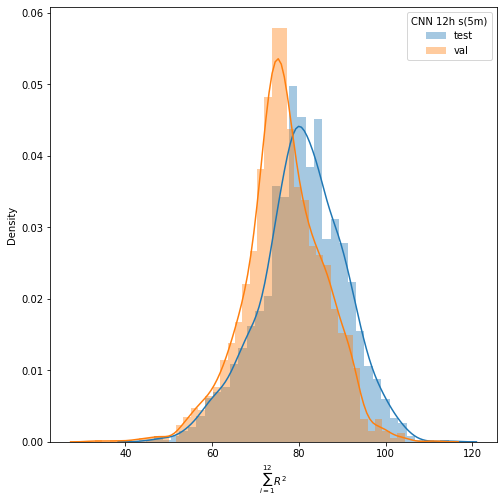

In [12]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(8,8), title='CNN 12h s(5m)', save='CNN_5m_12h_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          21.008
Method:                          IRLS   Log-Likelihood:                -5881.8
Date:                Wed, 12 Feb 2020   Deviance:                       41974.
Time:                        08:55:54   Pearson chi2:                 4.20e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8499      0.865      9.079      0.000       6.155       9.545
validation     0.9514      0.011     84.827      0.0

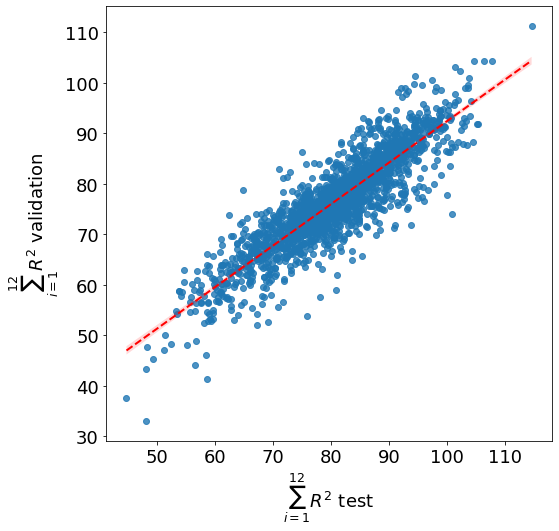

In [79]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="CNN_5m_12h_densplot", saveformat="png")

### CNN 12 h

In [5]:
query = {"experiment": "JM_CNN_5m_12h_05","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [6]:
print_config('config_CNN_5m_12h_05')

{'_id': '00000000',
 'arch': {'activation': 'relu',
          'activation2': 'relu',
          'activation_full': 'linear',
          'depth_multiplier': 1,
          'depth_multiplier2': 1,
          'dilation': False,
          'drop': 0,
          'drop2': 0,
          'filters': [32],
          'filters2': [32],
          'full': [16, 8],
          'fulldrop': 0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [3],
          'mode': 'CNN_sep_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1

[7.55972208 8.88504838 8.79145164 ... 6.90313567 5.44688903 5.46854824]
MEAN (test)= 6.9018171875130765
StDev (test)= 0.8003505827337153
MEAN (val)= 6.592283728349547
StDev (val)= 0.7332727990799732


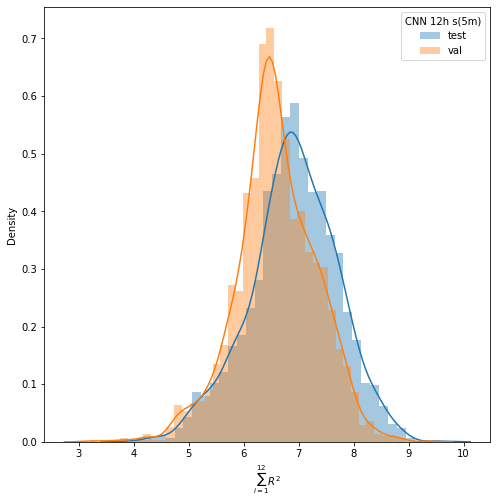

In [7]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(8,8), title='CNN 12h s(5m)', save='CNN_5m_12h_05_distplot',saveformat='png')